In [121]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr 

In [2]:
df = pd.read_csv("albana_ad-Ads-May-22-2022-May-30-2022.csv")

In [6]:
df.head(3)

,Reporting starts,Reporting ends,Ad name,Ad delivery,Ad Set Name,Bid,Bid type,Ad set budget,Ad set budget type,Last significant edit,...,Ends,Amount spent (MXN),Estimated ad recall lift rate,Link clicks,Result rate,Frequency,Clicks (all),CTR (all),Page engagement,Estimated ad recall lift (people)
0,2022-05-29,2022-05-29,Julie_Cafe,not_delivering,"Ejecutiva Awareness(C-, C)",0,ABSOLUTE_OCPM,150,Daily,2022-05-23T22:25:32-0500,...,2022-05-30,73.86,8.907710,10.0,8.078400,1.102658,15,0.198649,11.0,610
1,2022-05-28,2022-05-28,Julie_Cafe,not_delivering,"Ejecutiva Awareness(C-, C)",0,ABSOLUTE_OCPM,150,Daily,2022-05-23T22:25:32-0500,...,2022-05-30,74.58,9.119011,14.0,8.248287,1.105564,24,0.335524,15.0,590
2,2022-05-27,2022-05-27,Julie_Cafe,not_delivering,"Ejecutiva Awareness(C-, C)",0,ABSOLUTE_OCPM,150,Daily,2022-05-23T22:25:32-0500,...,2022-05-30,58.36,10.155317,8.0,9.134874,1.111708,8,0.143292,8.0,510


In [7]:
df.columns

Index(['Reporting starts', 'Reporting ends', 'Ad name', 'Ad delivery',
       'Ad Set Name', 'Bid', 'Bid type', 'Ad set budget', 'Ad set budget type',
       'Last significant edit', 'Attribution setting', 'Results',
       'Result indicator', 'Reach', 'Impressions', 'Cost per results',
       'Quality ranking', 'Starts', 'Ends', 'Amount spent (MXN)',
       'Estimated ad recall lift rate', 'Link clicks', 'Result rate',
       'Frequency', 'Clicks (all)', 'CTR (all)', 'Page engagement',
       'Estimated ad recall lift (people)'],
      dtype='object')

C:\Users\JUANME~1\AppData\Local\Temp/ipykernel_19640/738553563.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x_values, rotation = 60)


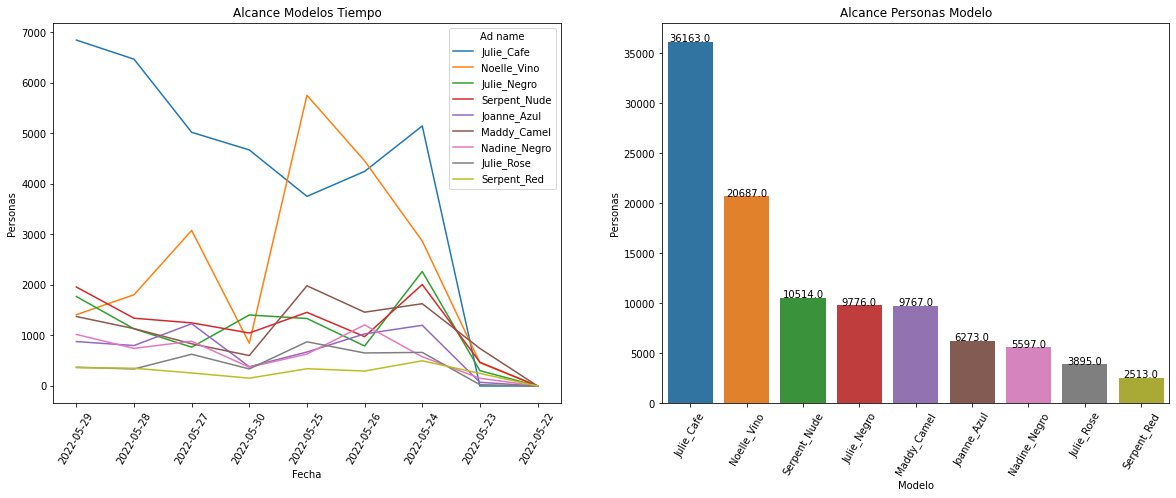

In [89]:
# Obtener los modelos con mayor Reachment
fig, ax = plt.subplots(1, 2, figsize = (20, 7))

# x_values = ['2022-05-30', '2022-05-29', '2022-05-28', '2022-05-27', '2022-05-26', '2022-05-25', '2022-05-24', '2022-05-23', '2022-05-22']
x_values = df["Reporting starts"].unique()

ax1 = sns.lineplot(data = df, x = "Reporting starts", y = "Reach", hue = "Ad name", ax = ax[0])
ax1.set_xticklabels(x_values, rotation = 60)
ax1.set_title("Alcance Modelos Tiempo")
ax1.set_ylabel("Personas")
ax1.set_xlabel("Fecha")

x_values = df.groupby("Ad name")["Reach"].sum().sort_values(ascending = False).reset_index()["Ad name"]
ax2 = sns.barplot(data = df, y = "Reach", x = "Ad name", ax = ax[1], ci = 0, order = x_values, estimator = sum)

for value in ax2.patches:
    ax2.annotate(format(value.get_height(), ".1f"), [value.get_x() + value.get_width() / 2, value.get_height() + 20], ha = "center")

ax2.set_ylabel("Personas")
ax2.set_xlabel("Modelo")
ax2.set_title("Alcance Personas Modelo")
ax2.set_xticklabels(x_values, rotation = 60)

# Alcance = Personas que vieron tu ad por mas de tres segundos

plt.show()


<Figure size 432x288 with 0 Axes>

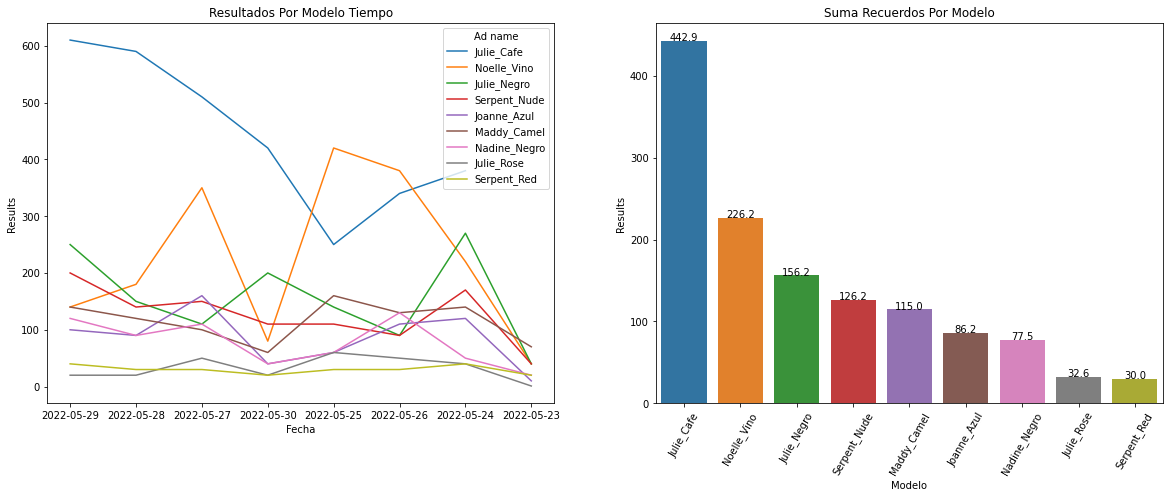

In [129]:
# Obtener los modelos con mejores Results
plt.clf()
fig, ax = plt.subplots(1, 2, figsize = (20, 7))

ax1 = sns.lineplot(data = df, x = "Reporting starts", y = "Results", hue = "Ad name", ax = ax[0])
ax1.set_xlabel("Fecha")
ax1.set_title("Resultados Por Modelo Tiempo")

x_values = df.groupby("Ad name")["Results"].sum().sort_values(ascending = False).reset_index()["Ad name"]
ax2 = sns.barplot(data = df, x = "Ad name", y = "Results", ax = ax[1], ci = 0, order = x_values)

for value in ax2.patches:
    ax2.annotate(format(value.get_height(), ".1f"), [value.get_x() + value.get_width() / 2, value.get_height() + 0.1], ha = "center")

ax2.set_xticklabels(x_values, rotation = 60)   
ax2.set_title("Suma Recuerdos Por Modelo")
ax2.set_xlabel("Modelo")

# Tasa resultados = resultados / impresiones
# Resultado = Persona altamente probable de recuerdo
# Impresiones = Cantidad de veces que tu ad se puso en una pantalla
# Resultado por modelo es que modelo genero mas recuerdo (Ad Recall)

plt.show()


C:\Users\JUANME~1\AppData\Local\Temp/ipykernel_19640/1124843317.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x_values, rotation = 60)


<Figure size 432x288 with 0 Axes>

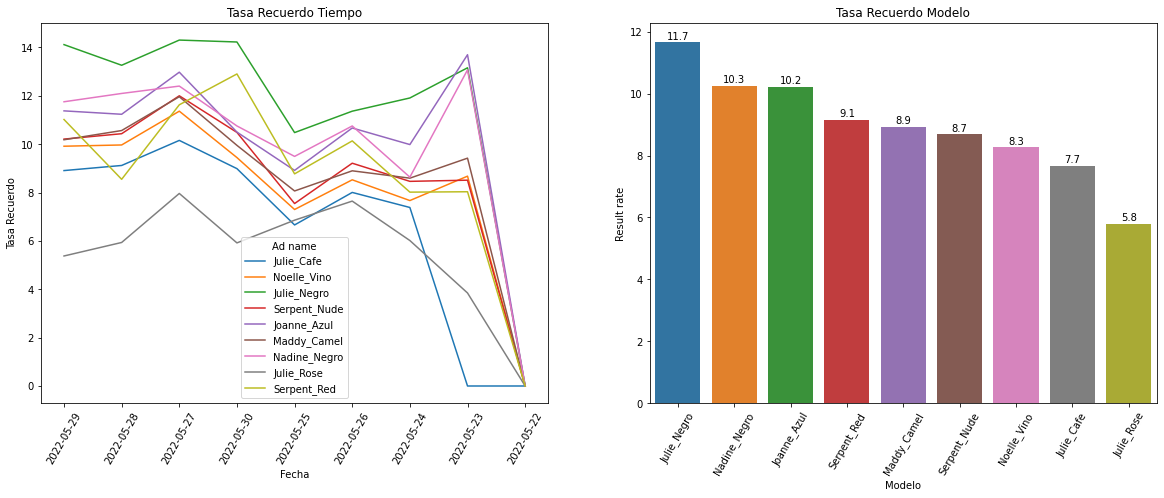

In [131]:
# Obtener los modelos con mejor recuerdo 
plt.clf()
fig, ax = plt.subplots(1, 2, figsize = (20, 7))

x_values = df["Reporting starts"].unique()
ax1 = sns.lineplot(data = df, x = "Reporting starts", y = "Estimated ad recall lift rate", hue = "Ad name", ax = ax[0])
ax1.set_xticklabels(x_values, rotation = 60)
ax1.set_xlabel("Fecha")
ax1.set_ylabel("Tasa Recuerdo")
ax1.set_title("Tasa Recuerdo Tiempo")

x_values = df.groupby("Ad name")["Result rate"].mean().sort_values(ascending = False).reset_index()["Ad name"]
ax2 = sns.barplot(data = df, x = "Ad name", y = "Result rate", ax = ax[1], ci = 0, order = x_values)

for value in ax2.patches:
    ax2.annotate(format(value.get_height(), ".1f"), [value.get_x() + value.get_width() / 2, value.get_height() + 0.1], ha = "center")
    
ax2.set_xticklabels(x_values, rotation = 60)
ax2.set_xlabel("Modelo")
ax2.set_title("Tasa Recuerdo Modelo")



plt.show()